# Vehicle ad data analysis 
### The purpose of this analysis is to better understand if theres a correlation between vehicles characteristics and days listed.

## importing necessary modules

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import altair as alt
import plotly.express as px
import seaborn as sns


## importing Dataset


In [148]:
data = pd.read_csv('/Users/deshawncouch/SDtoolsProject/vehicles_us.csv')

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [150]:
data.duplicated().sum()

0

In [151]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Cleaning data, removing NaN/0 values. Regarding cylinders, odometer and Model year using provided data used median amount to assume values based on model and model year.

In [152]:
data['is_4wd']= data['is_4wd'].fillna(0)
data['is_4wd'] = data['is_4wd'].astype('bool')   
data['manufacturer']=data['model'].str.split().str[0]
data['paint_color']=data['paint_color'].fillna('unknown')
data['model_year'] = data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median')) 
data['odometer'] = data['odometer'].fillna(data.groupby(['model_year'])['odometer'].transform('median')) 
data['cylinders'] = data['cylinders'].fillna(data.groupby(['model'])['cylinders'].transform('median'))
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
29223,7495,2014.0,ford focus,excellent,4.0,gas,90000.0,automatic,sedan,blue,False,2018-12-08,44,ford
27107,12500,2017.0,toyota corolla,like new,4.0,gas,44959.0,automatic,sedan,silver,False,2019-01-21,35,toyota
1420,29995,2014.0,ford f250,like new,8.0,diesel,128604.0,automatic,pickup,red,True,2019-03-08,38,ford
29740,23900,2011.0,ford f-150,excellent,6.0,gas,91600.0,automatic,pickup,unknown,True,2019-01-12,38,ford
43190,18995,2016.0,nissan maxima,excellent,6.0,gas,40184.0,automatic,sedan,unknown,False,2018-08-12,15,nissan
49549,12000,2014.0,chrysler town & country,excellent,6.0,gas,76200.0,automatic,mini-van,red,False,2018-08-30,132,chrysler
26759,14990,2011.0,ford f-150,excellent,6.0,gas,143659.0,automatic,pickup,black,True,2018-09-03,10,ford
8484,9995,2013.0,nissan maxima,excellent,6.0,gas,99840.0,automatic,sedan,grey,False,2018-05-15,18,nissan
49685,5750,2003.0,toyota camry,like new,4.0,gas,154390.0,automatic,sedan,blue,False,2019-01-25,48,toyota
47928,13000,2005.0,ford f-250,good,8.0,diesel,289000.0,automatic,truck,white,True,2018-11-05,65,ford


# Vehicle listing analysis

# Correlation between condition and Days listed 

DeltaGenerator()

### The goal here is to see how long are cars listed before they are sold

In [154]:
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

### It looks like most vehicles are sold around roughly 40 days!To sell cars faster the client should look to adjusting prices after the 45 day mark if vehicles have not sold.

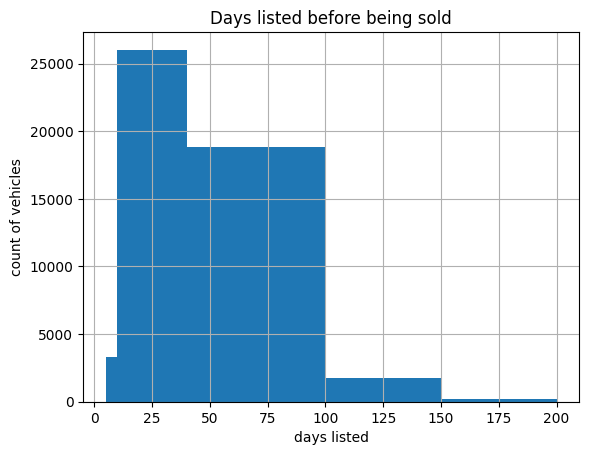

In [157]:
# histogram of days listed
data['days_listed'].hist(bins = [5, 10, 40, 100, 150, 200])
plt.xlabel('days listed')
plt.ylabel('count of vehicles')
plt.title('Days listed before being sold')
plt.show()

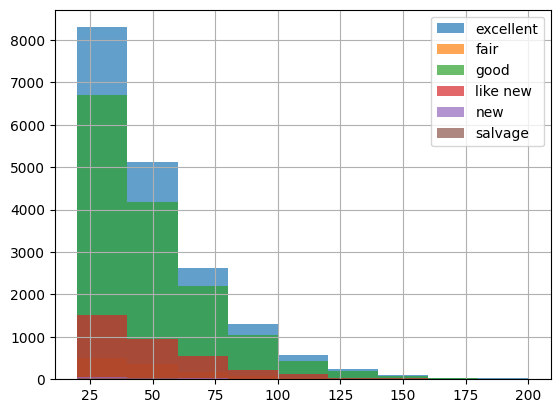

In [158]:
# Group by 'category' and create histograms for 'value'
data.groupby('condition')['days_listed'].hist(bins=[20,40,60,80,100,120,140,160,180,200],alpha=0.7, legend=True)
plt.show()

### It also appears that there is a steep decline in excellent condition vehicles as time passes. 